# Instance creator utility

data  
|-->info  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    |-->name  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    |-->description  
|-->network  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    |-->nodes  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        |-->node 0  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        .  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        .  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    |-->info  
|-->requests  
|-->fleet  

In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def TSubElement(parent, tag, attrib={}, text=None, **extra):
    element = ET.SubElement(parent, tag, attrib, **extra)
    if text:
        element.text = text
    return element

### XML tree related functions

In [3]:
def createInfo(root, name='', description=''):
    info = TSubElement(root, 'info')
    _name = TSubElement(info, 'name', text=name)
    _description = TSubElement(info, 'description', text=description)
    return

def createNetwork(root, numDepots, numCustomers, numChargeStations, 
                  cx_low=-1.0, cx_high=1.0, cy_low=-1.0, cy_high=1.0, 
                  request_min=0.01, request_max=0.8, 
                  tw_low_low=600.0, tw_low_high=960.0, tw_min_width= 20.0, tw_max_width=120.0, 
                  travel_time_min=3., travel_time_max=35., 
                  energy_consumption_min=2.0, energy_consumption_max=10.0,
                  max_capacity_charge_stations=4):
    
    network = TSubElement(root, 'network')
    nodes = TSubElement(network, 'nodes') # stores the nodes
    arcs = TSubElement(network, 'arcs') # stores arcs
    info = TSubElement(network, 'info') # stores info about the network
    technologies = TSubElement(network, 'technologies') # stores info about CS techonologies
    
    # depot nodes
    for i in range(numDepots):
        attr = {'id': str(i), 'type': str(0)}
        node = TSubElement(nodes, 'node', attrib=attr)

    # customer nodes
    for i in range(i+1, i+numCustomers+1):
        attr = {'id': str(i), 'type': str(1)}
        node = TSubElement(nodes, 'node', attrib=attr)
        
        request = np.random.uniform(request_min, request_max)
        _request = TSubElement(node, 'request', text='{:.2f}'.format(request))
        
        tw_low = np.random.uniform(tw_low_low, tw_low_high)
        tw_upp = tw_low + np.random.uniform(tw_min_width, tw_max_width)
        _tw_low = TSubElement(node, 'tw_low', text='{:.2f}'.format(tw_low))
        _tw_upp = TSubElement(node, 'tw_upp', text='{:.2f}'.format(tw_upp))

    # CS nodes
    for i in range(i+1, i+numChargeStations+1):
        attr = {'id': str(i), 'type': str(2)}
        node = TSubElement(nodes, 'node', attrib=attr)
        
        technology = np.random.randint(1, 4) # choose among 1, 2 and 3
        _technology = TSubElement(node, 'technology', text=str(technology))
        
        capacity = np.random.randint(1, max_capacity_charge_stations+1)
        _capatity = TSubElement(node, 'capacity', text=str(capacity))
    
    # add coordinates (random)
    for node in nodes:
        cx = np.random.uniform(cx_low, cx_high)
        cy = np.random.uniform(cy_low, cy_high)
        _cx = TSubElement(node, 'cx', text='{:.2f}'.format(cx))
        _cy = TSubElement(node, 'cy', text='{:.2f}'.format(cy))
        
    # Arcs
    for i in nodes:
        nodeFrom = TSubElement(arcs, 'node_from', attrib={'id': i.get('id')})
        for j in nodes:
            nodeTo = TSubElement(nodeFrom, 'node_to', attrib={'id': j.get('id')})
            
            if i == j:
                travelTime = 0.
                energyConsumption = 0.
            else:
                travelTime = np.random.uniform(travel_time_min, travel_time_max)
                energyConsumption = np.random.uniform(energy_consumption_min, energy_consumption_max)
                
            _travelTime = TSubElement(nodeTo, 'travel_time', text='{:.2f}'.format(travelTime))
            _energyConsumption = TSubElement(nodeTo, 'energy_consumption', text='{:.2f}'.format(energyConsumption))
            
    # technologies
    _tech1 = TSubElement(technologies, 'technology', attrib={'type': str(1)})
    _tech2 = TSubElement(technologies, 'technology', attrib={'type': str(2)})
    _tech3 = TSubElement(technologies, 'technology', attrib={'type': str(3)})
    
    tech1 = {'0.0': '0.0', '20.0': '75.0', '50.0': '80.0', '120.0': '100.0'}
    tech2 = {'0.0': '0.0', '15.0': '75.0', '40.0': '80.0', '80.0': '100.0'}
    tech3 = {'0.0': '0.0', '10.0': '75.0', '25.0': '80.0', '40.0': '100.0'}
    
    _tech_list = [_tech1, _tech2, _tech3]
    tech_list = [tech1, tech2, tech3]
    
    for _tech, tech in zip(_tech_list, tech_list):
        for chargingTime, battLevel in tech.items():
            breakPoint = TSubElement(_tech, 'breakpoint')
            _chargingTime = TSubElement(breakPoint, 'charging_time', text=chargingTime)
            _battLevel = TSubElement(breakPoint, 'battery_level', text= battLevel)
        
def createRequests(root):
    nodes = root.find('network').find('nodes')
    for node in nodes:
        if node.get('type') == '1':
            pass
    return

def createFleet(root, numEV, attrib):
    _fleet = TSubElement(root, 'fleet')
    _numEV = TSubElement(_fleet, 'fleet_size', text=str(numEV))
    _attributes = TSubElement(_fleet, 'vehicle_attributes')
    for attr, val in attrib.items():
        _attr = TSubElement(_attributes, str(attr), text=str(val))
    return

def createTree(numDepots, numCustomers, numChargeStations, numEV, attribsEV):
    dataElement = ET.Element('instance')
    
    infoElement = createInfo(dataElement)
    networkElement = createNetwork(dataElement, numDepots, numCustomers, numChargeStations)
    requestsElement = createRequests(dataElement)
    
    fleetElement = createFleet(dataElement, numEV, attribsEV)
    
    return ET.ElementTree(dataElement)

In [4]:
numDepot = 1
numCustomer = 5
numCS = 4

numEV = 4
attrib = {'max_payload': 1.5, 'max_tour_duration': 250.0}

dataTree = createTree(numDepot, numCustomer, numCS, numEV, attrib)

instanceName = 'd'+str(numDepot)+'c'+str(numCustomer)+'cs'+str(numCS)+'_ev'+str(numEV)
dataTree.write(instanceName+'.xml')

In [5]:
# usage example
nodes = dataTree.find('network').find('nodes')
arcs = dataTree.find('network').find('arcs')

f = 0
t = 7

print('travel time from', f, 'to', t, ':', float(arcs[f][t][0].text)) # travel time [f] to [t]
print('energy consumption from', f, 'to', t, ':', float(arcs[f][t][1].text)) # energy consumption [f] to [t]

travel time from 0 to 7 : 34.62
energy consumption from 0 to 7 : 6.58


In [12]:
# example of matrices construction
networkSize = len(nodes)

nodes_id = [int(x.get('id')) for x in nodes]
timeMatrix = np.zeros((networkSize, networkSize))
energyMatrix = np.zeros((networkSize, networkSize))
coordinates = {}

for i, nodeFrom in enumerate(arcs):
    for j, nodeTo in enumerate(nodeFrom):
        timeMatrix[i][j] = float(nodeTo[0].text)
        energyMatrix[i][j] = float(nodeTo[1].text)
    coordinates[i] = (float(nodes[i].find('cx').text), float(nodes[i].find('cy').text))

print('NODES IDSs:\n', nodes_id)
print('RESULTING TIME MATRIX:\n', timeMatrix)
print('RESULTING ENERGY CONSUMPTION MATRIX:\n', energyMatrix)
print('RESULTING NODES COORDINATES:\n',coordinates)

NODES IDSs:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RESULTING TIME MATRIX:
 [[ 0.   13.95 22.01 10.73 13.4   7.92 22.41 34.62 15.   14.28]
 [25.97  0.   11.24  9.07 28.53 32.91 25.76 23.42 19.45  9.64]
 [31.85  8.97  0.    3.15  8.56 15.1  22.93 29.22  8.65 12.94]
 [27.39 22.23  4.19  0.   23.5  34.47 30.34 30.78  5.28 16.07]
 [22.63 32.33 28.93 12.11  0.   32.45 24.78 20.64 31.77 28.57]
 [20.31 17.15 22.32 24.8  23.02  0.   19.83 29.   23.71 34.63]
 [22.34 29.86 15.57 34.54 17.42 19.5   0.   29.09 26.34 24.01]
 [ 9.95 17.03 19.71 11.51 23.96 31.95  7.75  0.    6.9  23.34]
 [22.92  7.14  9.08 31.57 30.03 20.66  6.39 27.86  0.   12.65]
 [ 5.07 14.08 17.31 13.85 33.13 15.07 21.04 19.23 11.67  0.  ]]
RESULTING ENERGY CONSUMPTION MATRIX:
 [[0.   3.98 8.63 6.08 4.59 2.32 7.56 6.58 8.87 8.79]
 [8.8  0.   7.06 5.12 9.19 8.92 4.36 4.16 5.9  7.04]
 [2.19 8.89 0.   7.14 6.87 2.17 6.23 4.2  9.81 9.04]
 [2.26 3.83 6.23 0.   6.51 5.29 5.87 6.77 9.3  3.49]
 [2.67 7.41 3.88 4.81 0.   3.76 3.03 9.23 5.6  5.41

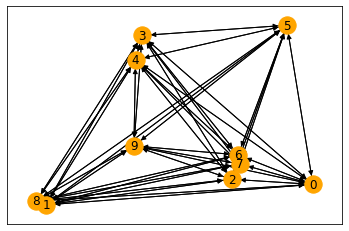

In [45]:
# show a graph of resulting network
G = nx.MultiDiGraph()

G.add_nodes_from(nodes_id)
for i, nodeFrom in enumerate(arcs):
    for j, nodeTo in enumerate(nodeFrom):
        G.add_edge(i, j, travel_time=timeMatrix[i][j], energy_consumption=energyMatrix[i][j])

nx.draw_networkx(G, with_labels=True, pos=coordinates, node_color='orange')
plt.show()

In [51]:
G.edges()

OutMultiEdgeDataView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)])